In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [ ]:
import holidays
feriados=[]
for date in holidays.Brazil(years=[2019,2020,2021]).items():
  feriados.append([str(date[0]),str(date[1])])
 
feriados = pd.DataFrame(feriados,columns=['ds','holiday'])
 
feriados.head()

,ds,holiday
0,2019-01-01,Ano novo
1,2019-04-21,"Páscoa, Tiradentes"
2,2019-05-01,Dia Mundial do Trabalho
3,2019-09-07,Independência do Brasil
4,2019-10-12,Nossa Senhora Aparecida


In [ ]:
covid=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv')

In [ ]:
mortes=covid[covid['Country/Region']=='Brazil'][['Date','Country/Region','Deaths','Confirmed']]
#mortes=covid[['Date','Country/Region','Deaths','Confirmed']]
mortes.tail(5)

,Date,Country/Region,Deaths,Confirmed
10690,2020-12-27,Brazil,191139,7484285
10691,2020-12-28,Brazil,191570,7504833
10692,2020-12-29,Brazil,192681,7563551
10693,2020-12-30,Brazil,193875,7619200
10694,2020-12-31,Brazil,194949,7675973


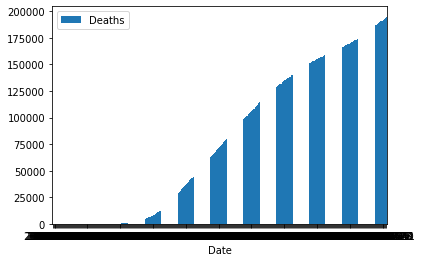

In [ ]:
mortes=mortes.groupby(['Date']).sum()['Deaths'].reset_index()
mortes
mortes.plot.bar(x='Date', y='Deaths', rot=0)

In [ ]:
mortes.columns=['ds','y']

In [ ]:
mortes['ds']=pd.to_datetime(mortes['ds'])

In [ ]:
m=Prophet(interval_width=0.95, holidays=feriados)
m.fit(mortes)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro=m.make_future_dataframe(periods=180)

In [ ]:
previsao=m.predict(futuro)

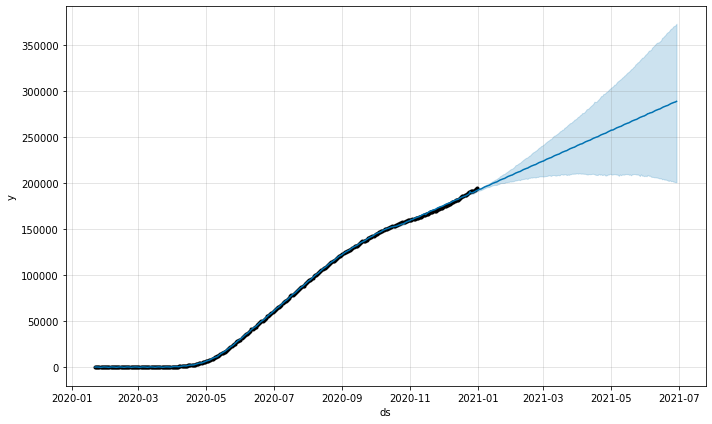

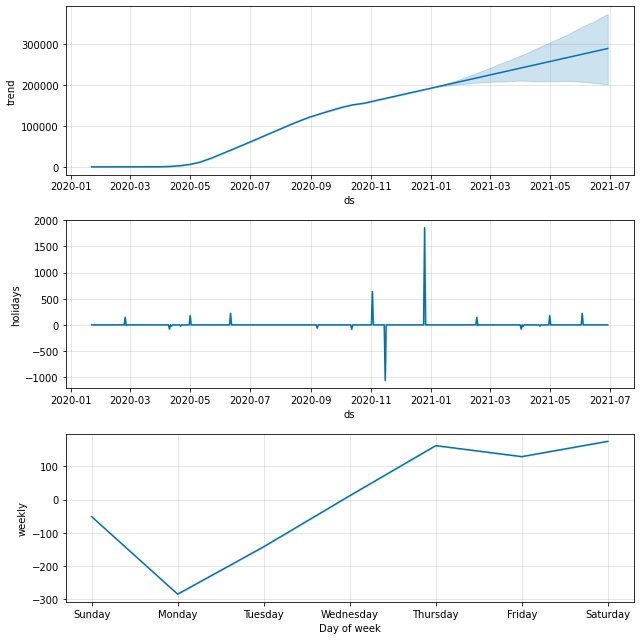

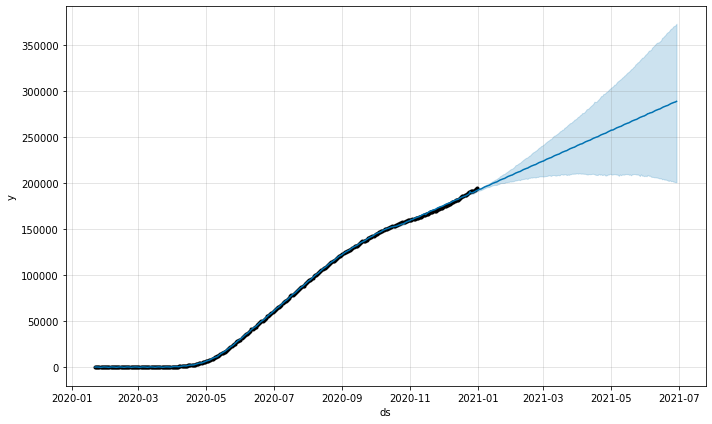

In [ ]:
m.plot_components(previsao)
m.plot(previsao)